In [1]:
include("../code/ldgm.jl")
include("../code/ldpc_graph.jl")

_check_consistency_polynomials_edges (generic function with 1 method)

## BP

Factors of degree 2, variables of degree 1 and 2

In [138]:
n = 7200
@show n
R = 0.2
m = round(Int, n*(1-R))
nedges, Λ, K = generate_polyn(n,m,degree_type=:nodes)
b = 10
G = ldpc_matrix(n, m, nedges, Λ, K)
# remove b factors
G = G[:,1:end-b];

n = 7200


In [139]:
k = size(G,2)
R = k/n
H = 15
s = rand((-1,1), n)   # source
efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
bp = LDGM(G, efield);

In [140]:
ε, niters = iteration!(bp, maxiter=10^4, damp=0.5)

(0.34233045974269627, 10000)

In [141]:
ovl,dist = performance(bp, s)

(0.9038888888888889, 0.04805555555555555)

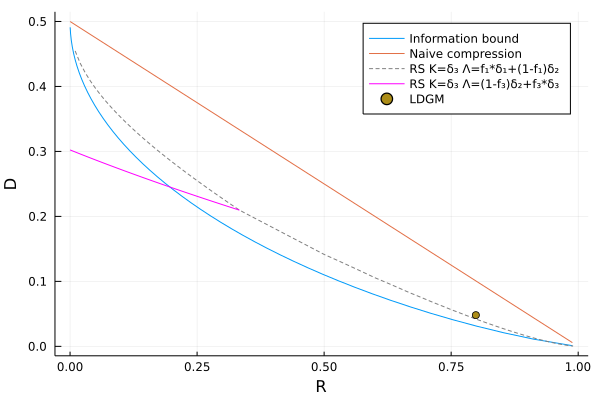

In [142]:
pl = plot_rdb()
scatter!([R], [dist], label="LDGM")

## BP, varying rate

In [ ]:
rr = 0.1:0.1:0.9
RR = zero(rr)
DD = zero(rr)
DD_sd = zero(rr)
navg = 5
n = 7200
H = 15
@showprogress for (i,r) in enumerate(rr)
    m = round(Int, n*(1-r))
    nedges, Λ, K = generate_polyn(n,m,degree_type=:nodes)
    D = zeros(navg)
    for j in 1:navg
        G = ldpc_matrix(n, m, nedges, Λ, K)
#         G = G[:,1:end-1];
        RR[i] = size(G,2)/n
        s = rand((-1,1), n)   # source
        efield = [(exp(ss*H),exp(-ss*H)) for ss in s]
        bp = LDGM(G, efield);
        ε, niters = iteration!(bp, maxiter=10^4, damp=0.5)
        ovl, D[j] = performance(bp, s)
    end
    DD[i] = mean(D)
    DD_sd[i] = std(D)/sqrt(navg)
end

Progress:  67%|███████████████████████████▍             |  ETA: 0:00:46

In [ ]:
plot_rdb()
scatter!(RR,DD, label="LDGM - n=$n, H=$H", yerr=DD_sd, legend=:outertopright, size=(700,400))

## Max-Sum

Factors of degree 2, variables of degree 1 and 2

In [81]:
n = 7200
@show n
r = 0.7
m = round(Int, n*(1-r))
nedges, Λ, K = generate_polyn(n,m,degree_type=:nodes)
b = 1
G = ldpc_matrix(n, m, nedges, Λ, K)
# remove b factors
G = G[:,1:end-b];

n = 7200


In [82]:
k = size(G,2)
R = k/n
H = 1
s = rand((-1,1), n)   # source
efield = [float.((ss*H,-ss*H)) for ss in s]
ms = LDGM(G, efield);

In [83]:
ε, niters = iteration!(ms, maxiter=10^4, damp=0.5, update_v! = update_var_ms!, update_f! = update_factor_ms!)

(-1, 2)

In [84]:
ovl,dist = performance(ms, s)

(0.007777777777777772, 0.4961111111111111)

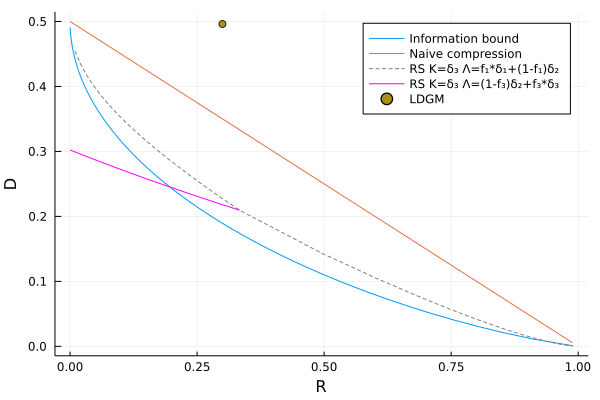

In [85]:
pl = plot_rdb()
scatter!([R], [dist], label="LDGM")